In [105]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [106]:
def normalizar(df, variable, funcao):
    if funcao == 'n':
        casoTeorico = [size for size in df['Array Size']]
    elif funcao == 'nlogn':
        casoTeorico = [size * np.log(size) for size in df['Array Size']]
    elif funcao == 'n2':
        casoTeorico = [size * size for size in df['Array Size']]

    # Normalizar os dados teóricos para comparação com os empíricos
    maxEmpirico = max(df[variable])
    maxTeorico = max(casoTeorico)
    casoTeorico = [time * (maxEmpirico / maxTeorico) for time in casoTeorico]

    return casoTeorico

In [107]:
def plot(df, casoTeorico, title, xlabel, ylabel, variable):
    plt.figure(figsize=(10, 5))
    plt.plot(df['Array Size'], df[variable], marker='o', color='b')
    plt.plot(df['Array Size'], casoTeorico, marker='o', color='r', linestyle='--')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(True)
    plt.legend(['Caso Empírico', 'Caso Teórico'])

    plt.show()

def plotAllAlgorithms(df, title, xlabel, ylabel, variable):
    plt.figure(figsize=(10, 5))
    plt.plot(df[0]['Array Size'], df[0][variable], marker='o', color='b')
    plt.plot(df[1]['Array Size'], df[1][variable], marker='o', color='g')
    plt.plot(df[2]['Array Size'], df[2][variable], marker='o', color='r')
    plt.plot(df[3]['Array Size'], df[3][variable], marker='o', color='y')
    plt.plot(df[4]['Array Size'], df[4][variable], marker='o', color='m')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(True)
    plt.legend(['InsertionSort', 'SelectionSort', 'MergeSort', 'HeapSort', 'QuickSort'])

    plt.show()

def plotWithoutSelectionSort(df, title, xlabel, ylabel, variable):
    plt.figure(figsize=(10, 5))
    plt.plot(df[0]['Array Size'], df[0][variable], marker='o', color='b')
    plt.plot(df[2]['Array Size'], df[2][variable], marker='o', color='r')
    plt.plot(df[3]['Array Size'], df[3][variable], marker='o', color='y')
    plt.plot(df[4]['Array Size'], df[4][variable], marker='o', color='m')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(True)
    plt.legend(['InsertionSort', 'MergeSort', 'HeapSort', 'QuickSort'])

    plt.show()

def plotStandardDeviation(df, title):
    plt.figure(figsize=(10, 5))
    plt.plot(df['Array Size'], df['Std_Execution_Time'], marker='o', color='b')
    plt.title(title)
    plt.xlabel('Tamanho do Array')
    plt.ylabel('Tempo de Execução (s)')
    plt.grid(True)

    plt.show()

In [108]:
insertionSortMelhorCaso = pd.read_csv('insertion_sort_melhor_caso.csv')
insertionSortPiorCaso = pd.read_csv('insertion_sort_pior_caso.csv')
insertionSortCasoMedio = pd.read_csv('insertion_sort_caso_medio.csv')

selectionSortMelhorCaso = pd.read_csv('selection_sort_melhor_caso.csv')
selectionSortPiorCaso = pd.read_csv('selection_sort_pior_caso.csv')
selectionSortCasoMedio = pd.read_csv('selection_sort_caso_medio.csv')

mergeSortMelhorCaso = pd.read_csv('merge_sort_melhor_caso.csv')
mergeSortPiorCaso = pd.read_csv('merge_sort_pior_caso.csv')
mergeSortCasoMedio = pd.read_csv('merge_sort_caso_medio.csv')

heapSortMelhorCaso = pd.read_csv('heap_sort_melhor_caso.csv')
heapSortPiorCaso = pd.read_csv('heap_sort_pior_caso.csv')
heapSortCasoMedio = pd.read_csv('heap_sort_caso_medio.csv')

quickSortMelhorCaso = pd.read_csv('quick_sort_melhor_caso.csv')
quickSortPiorCaso = pd.read_csv('quick_sort_pior_caso.csv')
quickSortCasoMedio = pd.read_csv('quick_sort_caso_medio.csv')

In [109]:
insertionSortAnaliseCasoMedio = insertionSortCasoMedio.groupby('Array Size').agg(
    Mean_Execution_Time=('Execution Time (seconds)', 'mean'),
    Std_Execution_Time=('Execution Time (seconds)', 'std'),
    Mean_Comparisons=('Comparisons', 'mean'),
    Std_Comparisons=('Comparisons', 'std')
).reset_index()

selectionSortAnaliseCasoMedio = selectionSortCasoMedio.groupby('Array Size').agg(
    Mean_Execution_Time=('Execution Time (seconds)', 'mean'),
    Std_Execution_Time=('Execution Time (seconds)', 'std'),
    Mean_Comparisons=('Comparisons', 'mean'),
    Std_Comparisons=('Comparisons', 'std')
).reset_index()

mergeSortAnaliseCasoMedio = mergeSortCasoMedio.groupby('Array Size').agg(
    Mean_Execution_Time=('Execution Time (seconds)', 'mean'),
    Std_Execution_Time=('Execution Time (seconds)', 'std'),
    Mean_Comparisons=('Comparisons', 'mean'),
    Std_Comparisons=('Comparisons', 'std')
).reset_index()

heapSortAnaliseCasoMedio = heapSortCasoMedio.groupby('Array Size').agg(
    Mean_Execution_Time=('Execution Time (seconds)', 'mean'),
    Std_Execution_Time=('Execution Time (seconds)', 'std'),
    Mean_Comparisons=('Comparisons', 'mean'),
    Std_Comparisons=('Comparisons', 'std')
).reset_index()

quickSortAnaliseCasoMedio = quickSortCasoMedio.groupby('Array Size').agg(
    Mean_Execution_Time=('Execution Time (seconds)', 'mean'),
    Std_Execution_Time=('Execution Time (seconds)', 'std'),
    Mean_Comparisons=('Comparisons', 'mean'),
    Std_Comparisons=('Comparisons', 'std')
).reset_index()

In [110]:
melhoresCasos = [insertionSortMelhorCaso, selectionSortMelhorCaso, mergeSortMelhorCaso, heapSortMelhorCaso, quickSortMelhorCaso]
pioresCasos = [insertionSortPiorCaso, selectionSortPiorCaso, mergeSortPiorCaso, heapSortPiorCaso, quickSortPiorCaso]
casosMedios = [insertionSortAnaliseCasoMedio, selectionSortAnaliseCasoMedio, mergeSortAnaliseCasoMedio, heapSortAnaliseCasoMedio, quickSortAnaliseCasoMedio]

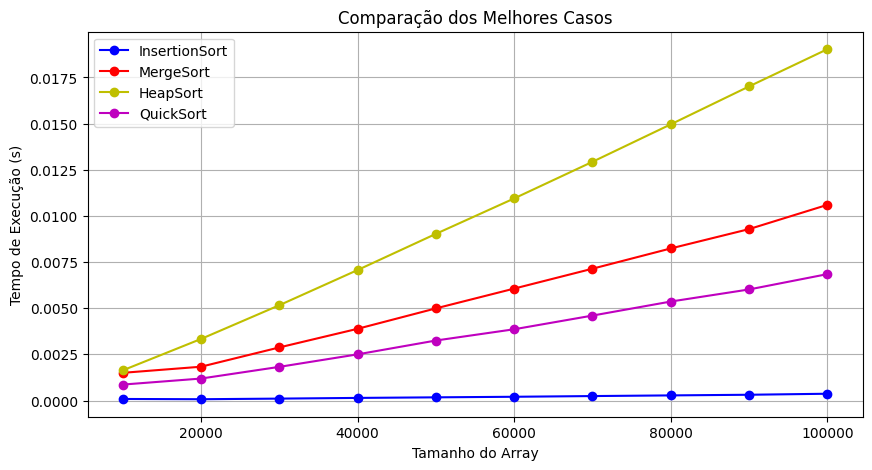

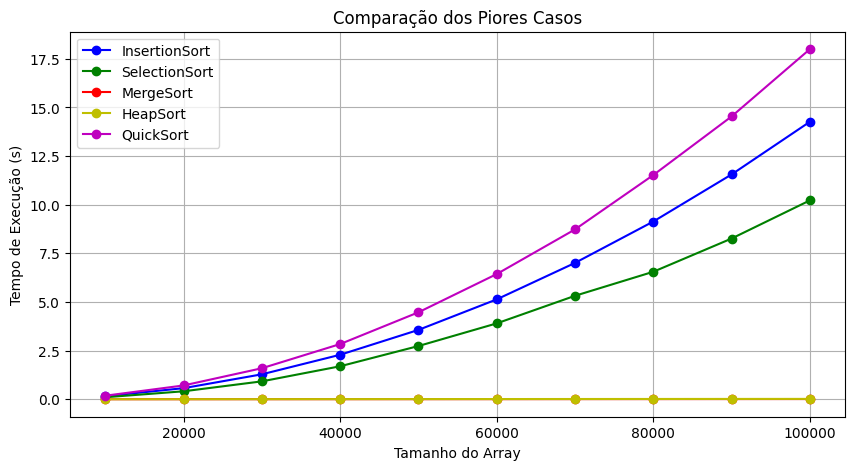

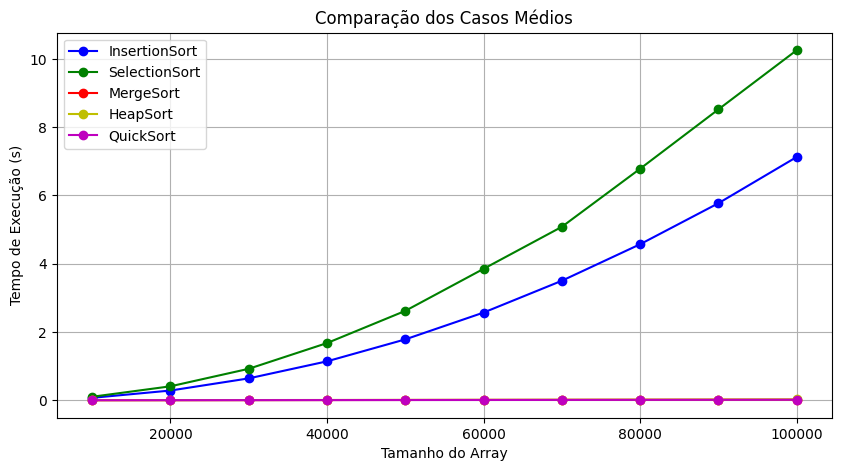

In [111]:
plotWithoutSelectionSort(melhoresCasos, 'Comparação dos Melhores Casos', 'Tamanho do Array', 'Tempo de Execução (s)', 'Execution Time (seconds)')
plotAllAlgorithms(pioresCasos, 'Comparação dos Piores Casos', 'Tamanho do Array', 'Tempo de Execução (s)', 'Execution Time (seconds)')
plotAllAlgorithms(casosMedios, 'Comparação dos Casos Médios', 'Tamanho do Array', 'Tempo de Execução (s)', 'Mean_Execution_Time')
#plotAllAlgorithms(casosMedios, 'Comparação dos Desvios Padrão', 'Tamanho do Array', 'Tempo de Execução (s)', 'Std_Execution_Time')

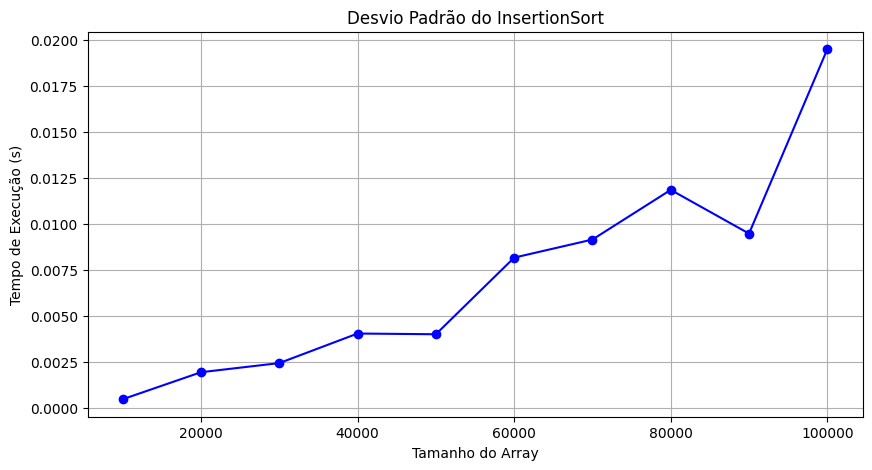

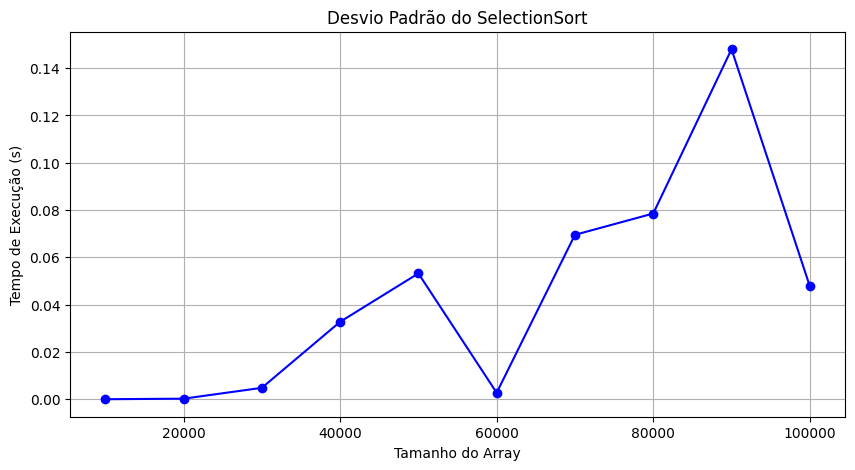

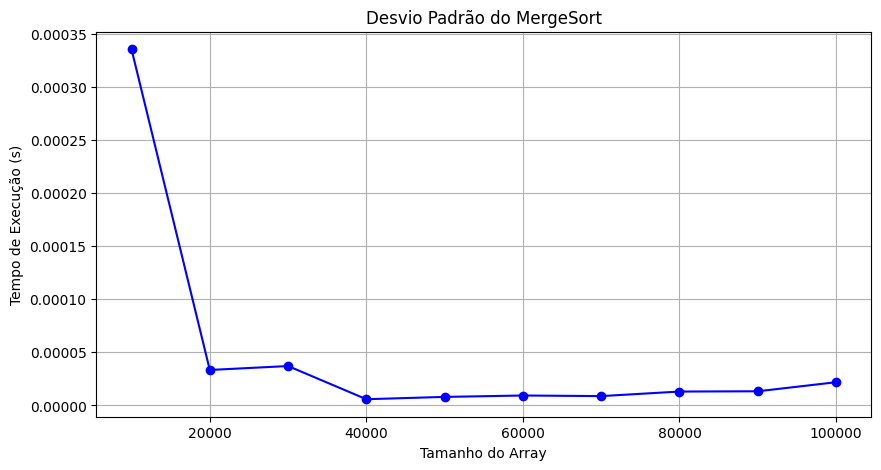

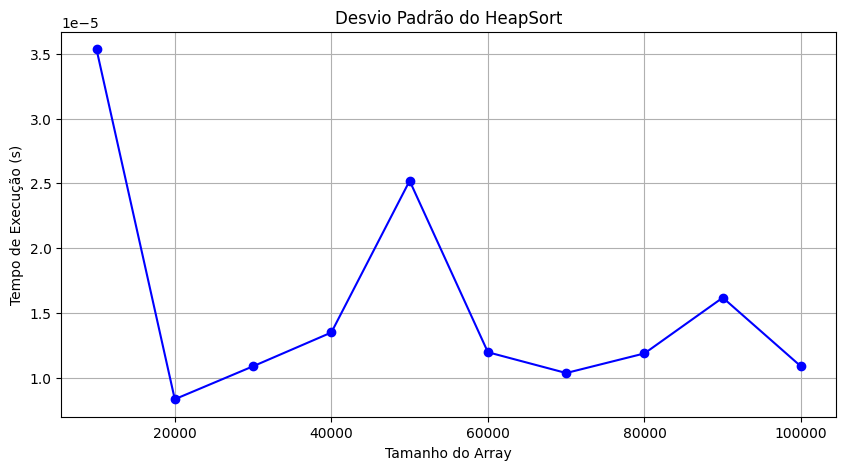

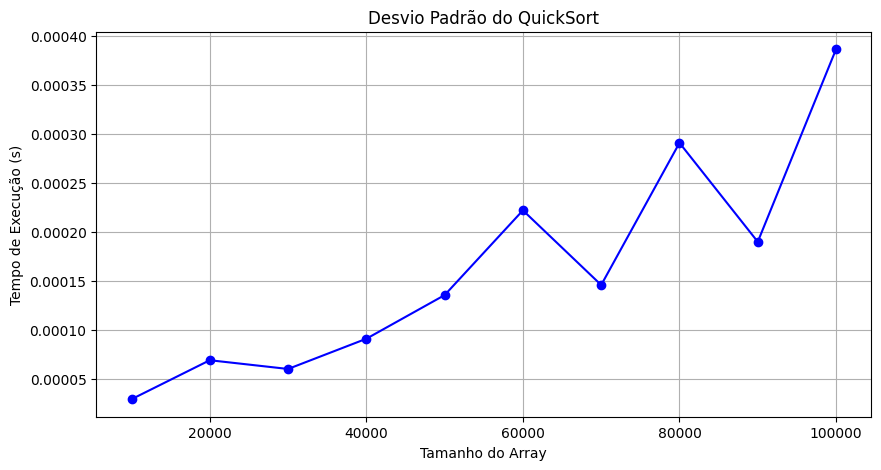

In [112]:
plotStandardDeviation(insertionSortAnaliseCasoMedio, 'Desvio Padrão do InsertionSort')
plotStandardDeviation(selectionSortAnaliseCasoMedio, 'Desvio Padrão do SelectionSort')
plotStandardDeviation(mergeSortAnaliseCasoMedio, 'Desvio Padrão do MergeSort')
plotStandardDeviation(heapSortAnaliseCasoMedio, 'Desvio Padrão do HeapSort')
plotStandardDeviation(quickSortAnaliseCasoMedio, 'Desvio Padrão do QuickSort')

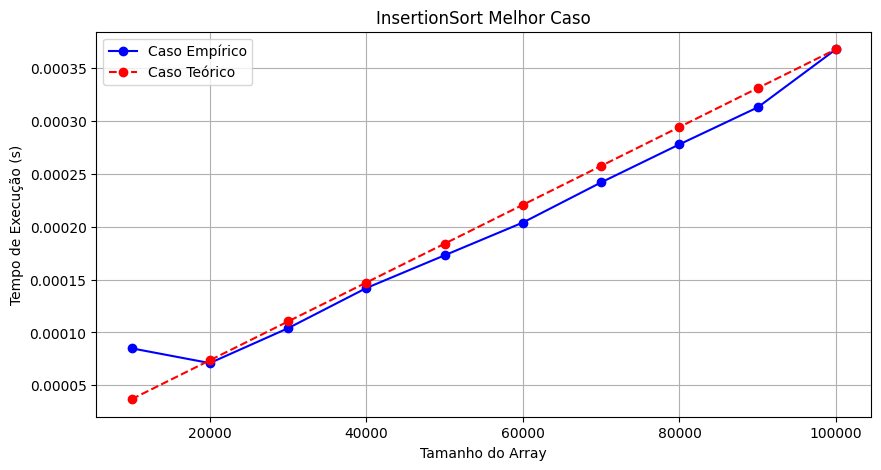

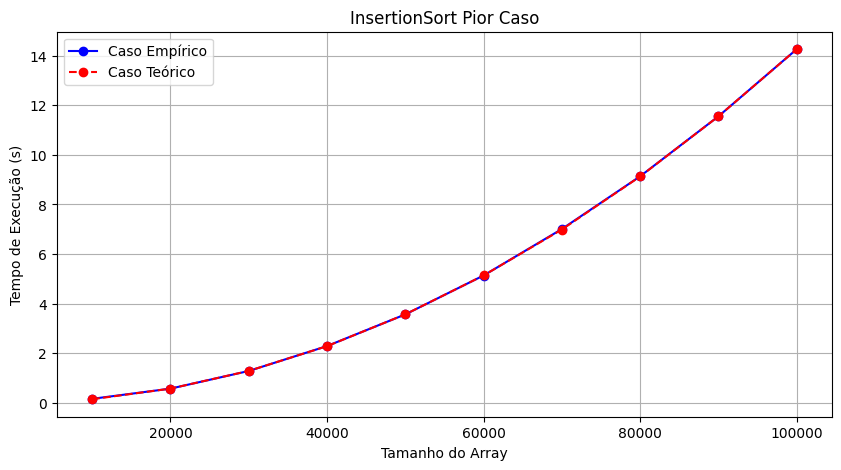

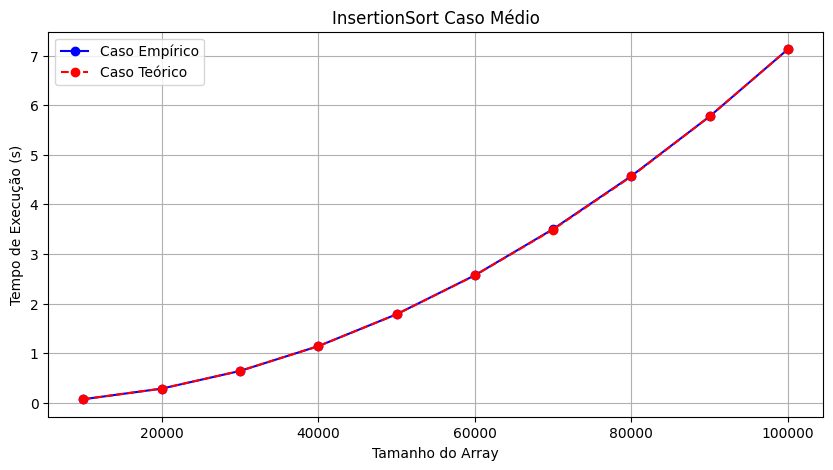

In [113]:
melhorCasoTeorico = normalizar(insertionSortMelhorCaso, 'Execution Time (seconds)', 'n')
piorCasoTeorico = normalizar(insertionSortPiorCaso, 'Execution Time (seconds)', 'n2')
casoMedioTeorico = normalizar(insertionSortAnaliseCasoMedio, 'Mean_Execution_Time', 'n2')

plot(insertionSortMelhorCaso, melhorCasoTeorico, 'InsertionSort Melhor Caso', 'Tamanho do Array', 'Tempo de Execução (s)', 'Execution Time (seconds)')
plot(insertionSortPiorCaso, piorCasoTeorico, 'InsertionSort Pior Caso', 'Tamanho do Array', 'Tempo de Execução (s)', 'Execution Time (seconds)')
plot(insertionSortAnaliseCasoMedio, casoMedioTeorico, 'InsertionSort Caso Médio', 'Tamanho do Array', 'Tempo de Execução (s)', 'Mean_Execution_Time')

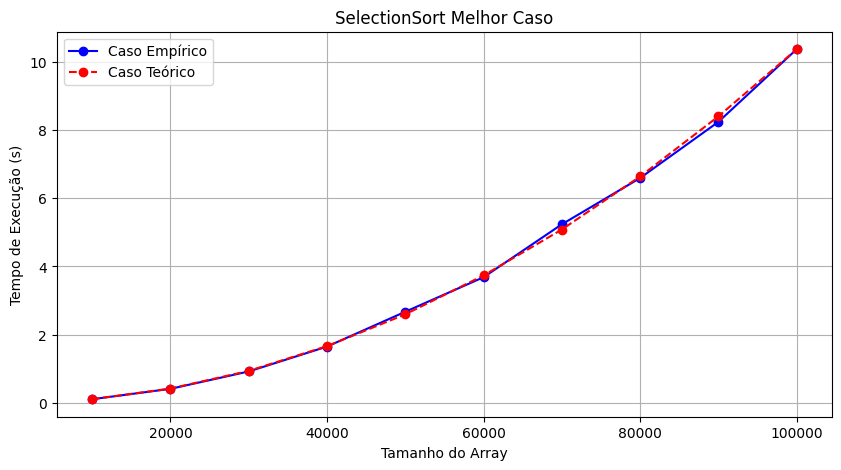

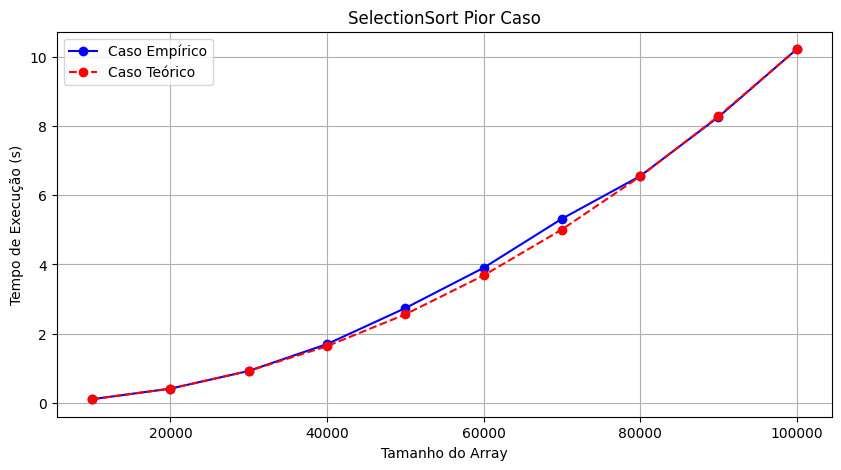

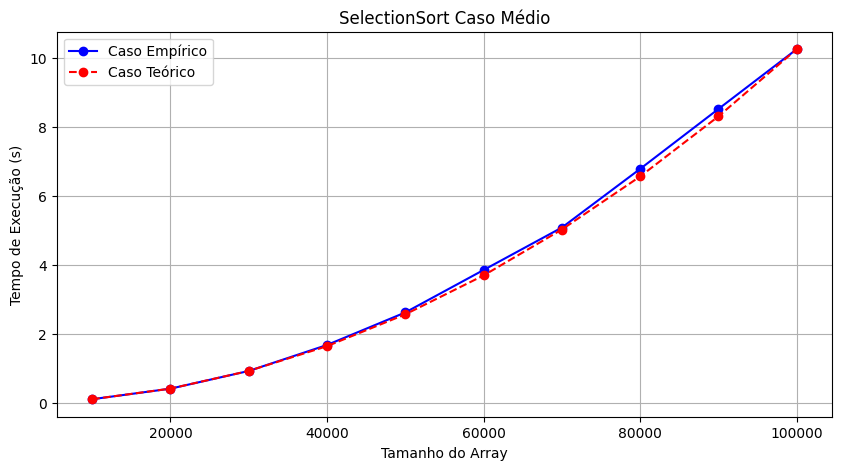

In [114]:
melhorCasoTeorico = normalizar(selectionSortMelhorCaso, 'Execution Time (seconds)', 'n2')
piorCasoTeorico = normalizar(selectionSortPiorCaso, 'Execution Time (seconds)', 'n2')
casoMedioTeorico = normalizar(selectionSortAnaliseCasoMedio, 'Mean_Execution_Time', 'n2')

plot(selectionSortMelhorCaso, melhorCasoTeorico, 'SelectionSort Melhor Caso', 'Tamanho do Array', 'Tempo de Execução (s)', 'Execution Time (seconds)')
plot(selectionSortPiorCaso, piorCasoTeorico, 'SelectionSort Pior Caso', 'Tamanho do Array', 'Tempo de Execução (s)', 'Execution Time (seconds)')
plot(selectionSortAnaliseCasoMedio, casoMedioTeorico, 'SelectionSort Caso Médio', 'Tamanho do Array', 'Tempo de Execução (s)', 'Mean_Execution_Time')

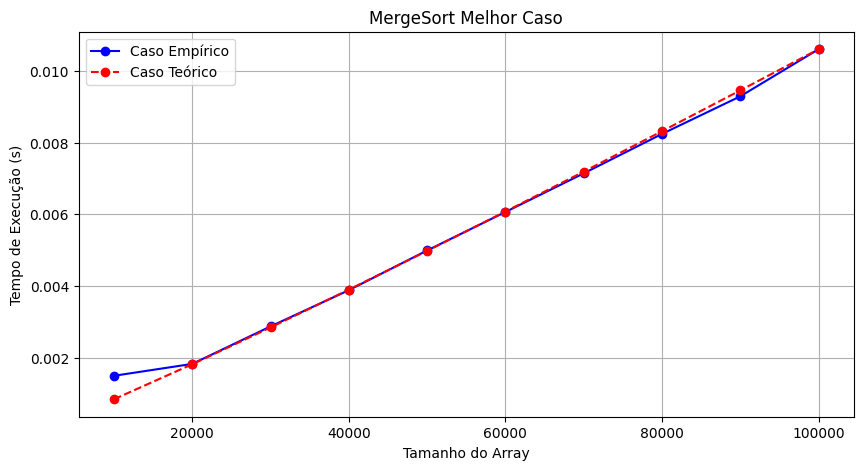

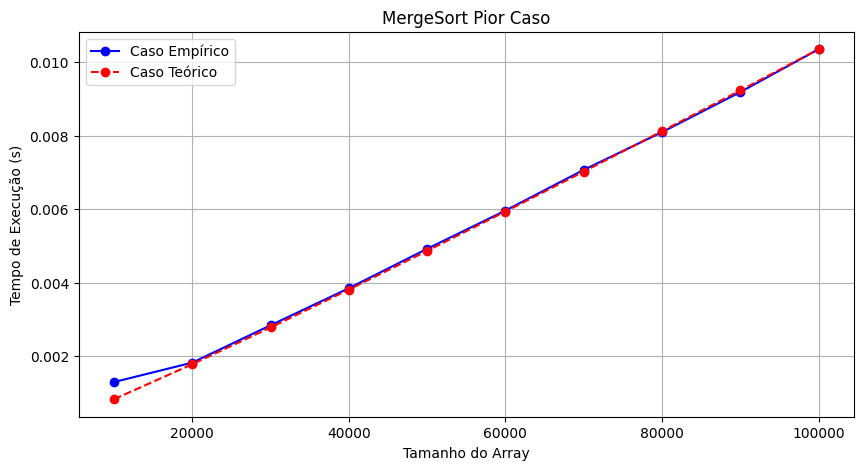

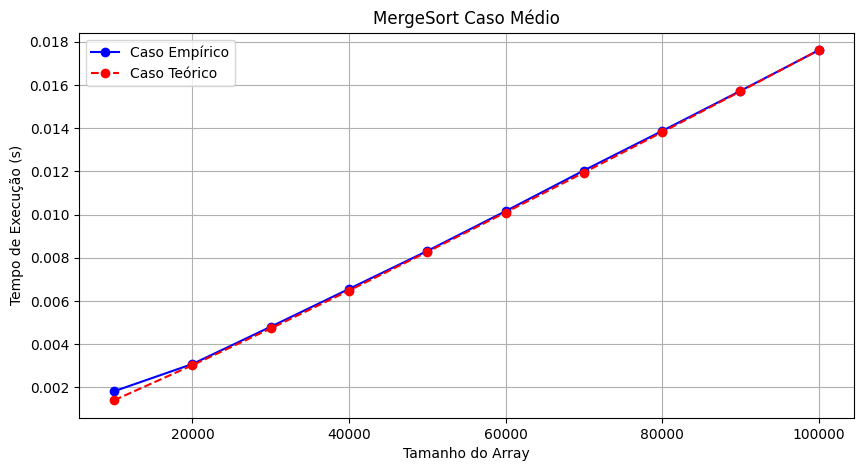

In [115]:
melhorCasoTeorico = normalizar(mergeSortMelhorCaso, 'Execution Time (seconds)', 'nlogn')
piorCasoTeorico = normalizar(mergeSortPiorCaso, 'Execution Time (seconds)', 'nlogn')
casoMedioTeorico = normalizar(mergeSortAnaliseCasoMedio, 'Mean_Execution_Time', 'nlogn')

plot(mergeSortMelhorCaso, melhorCasoTeorico, 'MergeSort Melhor Caso', 'Tamanho do Array', 'Tempo de Execução (s)', 'Execution Time (seconds)')
plot(mergeSortPiorCaso, piorCasoTeorico, 'MergeSort Pior Caso', 'Tamanho do Array', 'Tempo de Execução (s)', 'Execution Time (seconds)')
plot(mergeSortAnaliseCasoMedio, casoMedioTeorico, 'MergeSort Caso Médio', 'Tamanho do Array', 'Tempo de Execução (s)', 'Mean_Execution_Time')

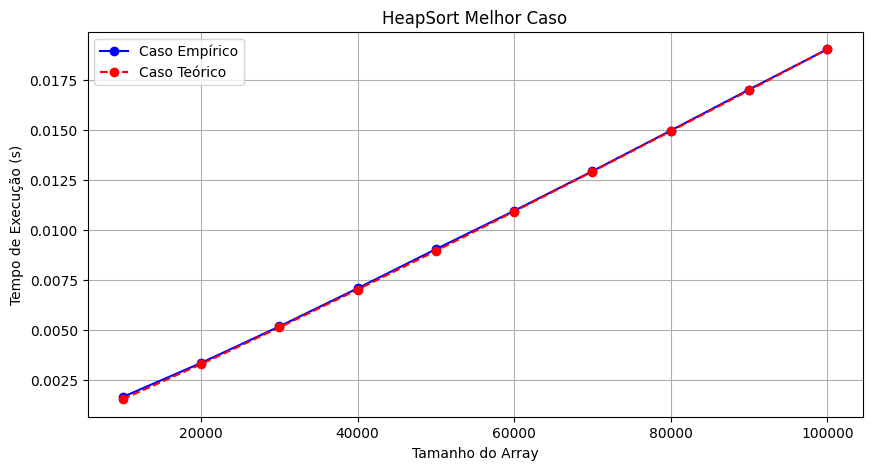

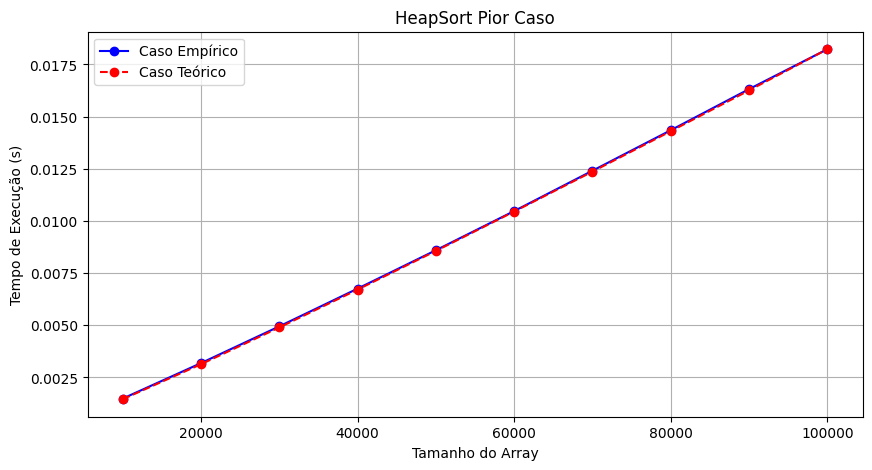

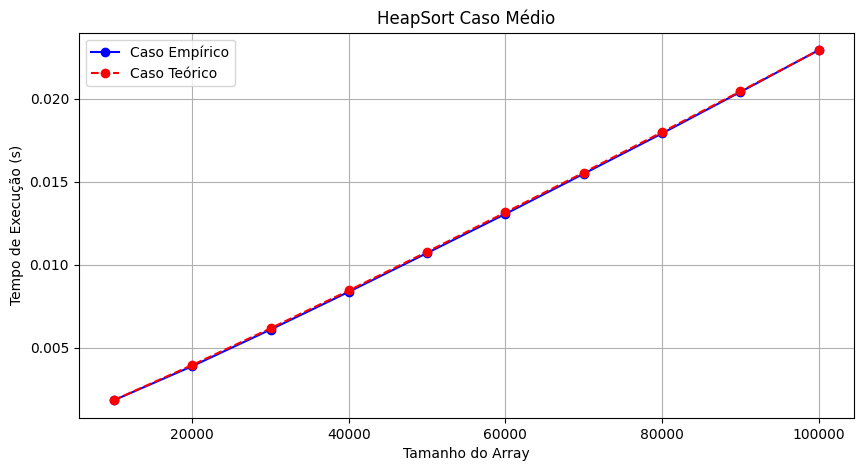

In [116]:
melhorCasoTeorico = normalizar(heapSortMelhorCaso, 'Execution Time (seconds)', 'nlogn')
piorCasoTeorico = normalizar(heapSortPiorCaso, 'Execution Time (seconds)', 'nlogn')
casoMedioTeorico = normalizar(heapSortAnaliseCasoMedio, 'Mean_Execution_Time', 'nlogn')

plot(heapSortMelhorCaso, melhorCasoTeorico, 'HeapSort Melhor Caso', 'Tamanho do Array', 'Tempo de Execução (s)', 'Execution Time (seconds)')
plot(heapSortPiorCaso, piorCasoTeorico, 'HeapSort Pior Caso', 'Tamanho do Array', 'Tempo de Execução (s)', 'Execution Time (seconds)')
plot(heapSortAnaliseCasoMedio, casoMedioTeorico, 'HeapSort Caso Médio', 'Tamanho do Array', 'Tempo de Execução (s)', 'Mean_Execution_Time')

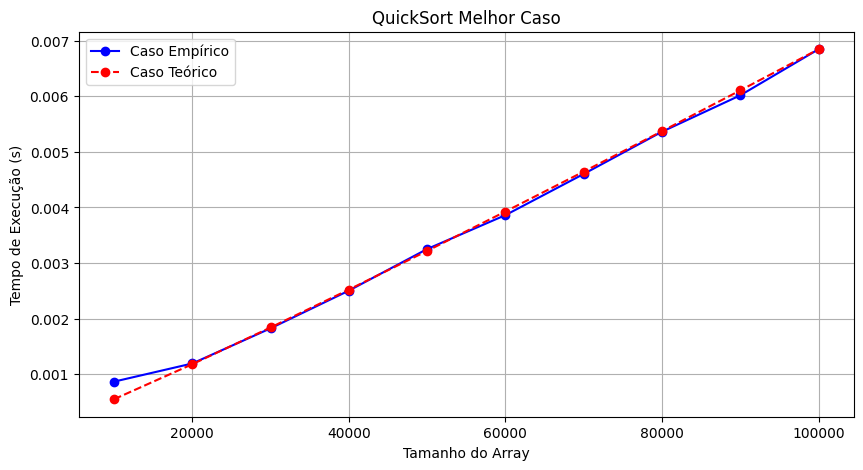

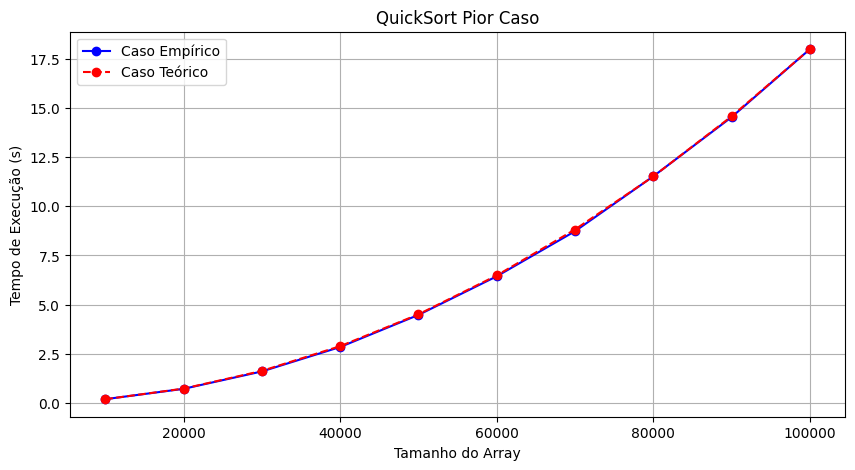

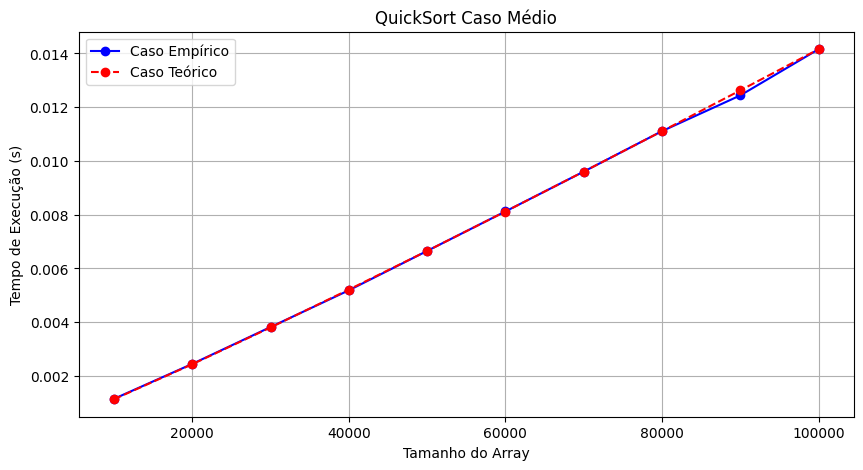

In [117]:
melhorCasoTeorico = normalizar(quickSortMelhorCaso, 'Execution Time (seconds)', 'nlogn')
piorCasoTeorico = normalizar(quickSortPiorCaso, 'Execution Time (seconds)', 'n2')
casoMedioTeorico = normalizar(quickSortAnaliseCasoMedio, 'Mean_Execution_Time', 'nlogn')

plot(quickSortMelhorCaso, melhorCasoTeorico, 'QuickSort Melhor Caso', 'Tamanho do Array', 'Tempo de Execução (s)', 'Execution Time (seconds)')
plot(quickSortPiorCaso, piorCasoTeorico, 'QuickSort Pior Caso', 'Tamanho do Array', 'Tempo de Execução (s)', 'Execution Time (seconds)')
plot(quickSortAnaliseCasoMedio, casoMedioTeorico, 'QuickSort Caso Médio', 'Tamanho do Array', 'Tempo de Execução (s)', 'Mean_Execution_Time')

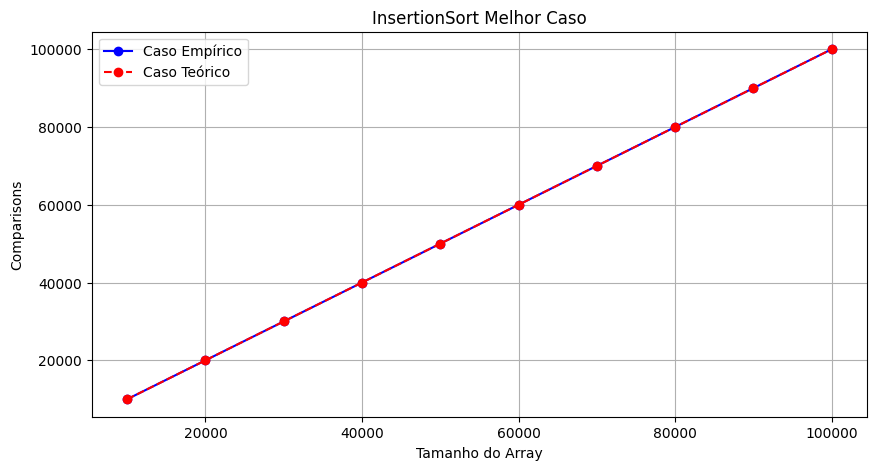

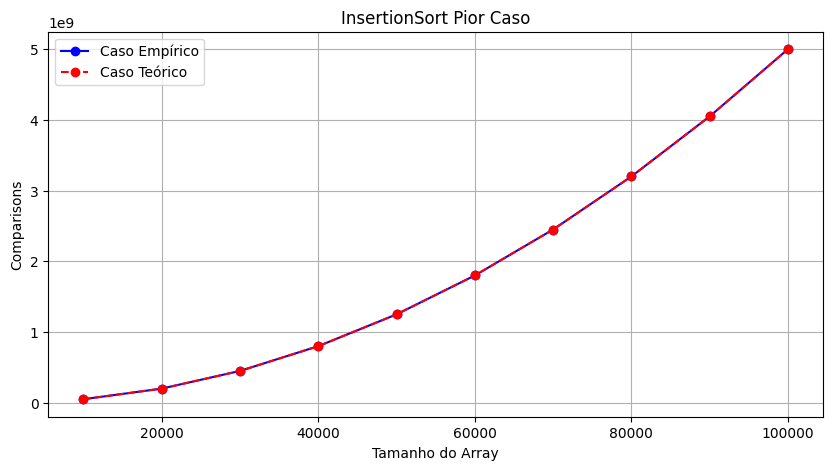

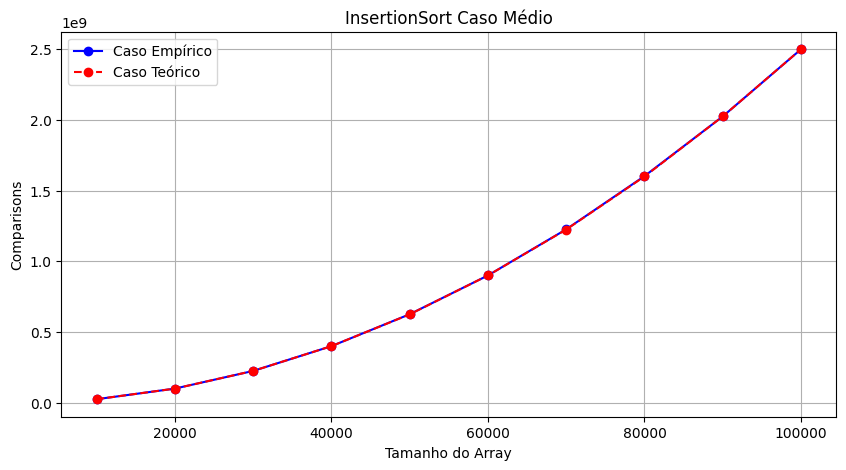

In [118]:
melhorCasoTeorico = normalizar(insertionSortMelhorCaso, 'Comparisons', 'n')
piorCasoTeorico = normalizar(insertionSortPiorCaso, 'Comparisons', 'n2')
casoMedioTeorico = normalizar(insertionSortAnaliseCasoMedio, 'Mean_Comparisons', 'n2')

plot(insertionSortMelhorCaso, melhorCasoTeorico, 'InsertionSort Melhor Caso', 'Tamanho do Array', 'Comparisons', 'Comparisons')
plot(insertionSortPiorCaso, piorCasoTeorico, 'InsertionSort Pior Caso', 'Tamanho do Array', 'Comparisons', 'Comparisons')
plot(insertionSortAnaliseCasoMedio, casoMedioTeorico, 'InsertionSort Caso Médio', 'Tamanho do Array', 'Comparisons', 'Mean_Comparisons')

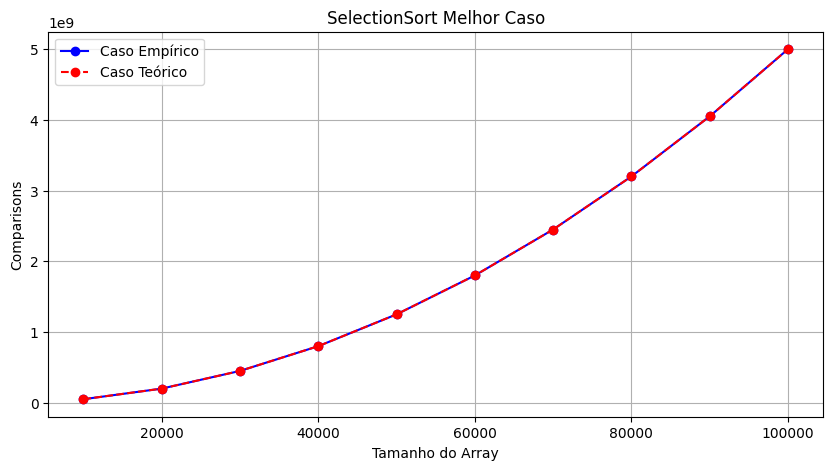

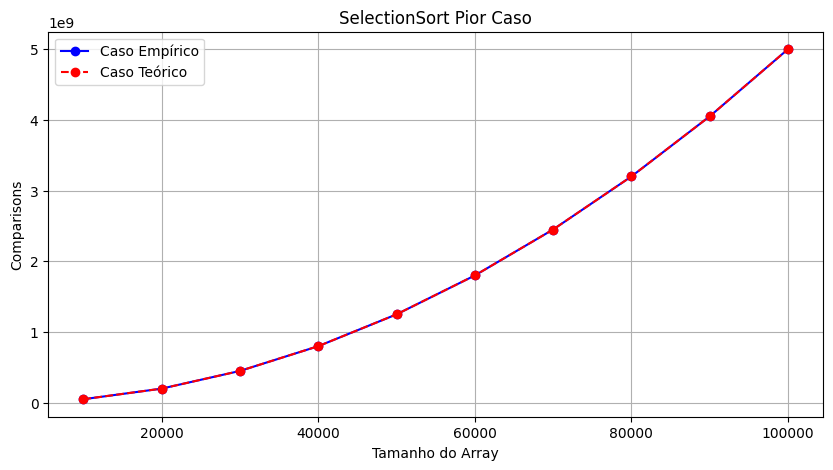

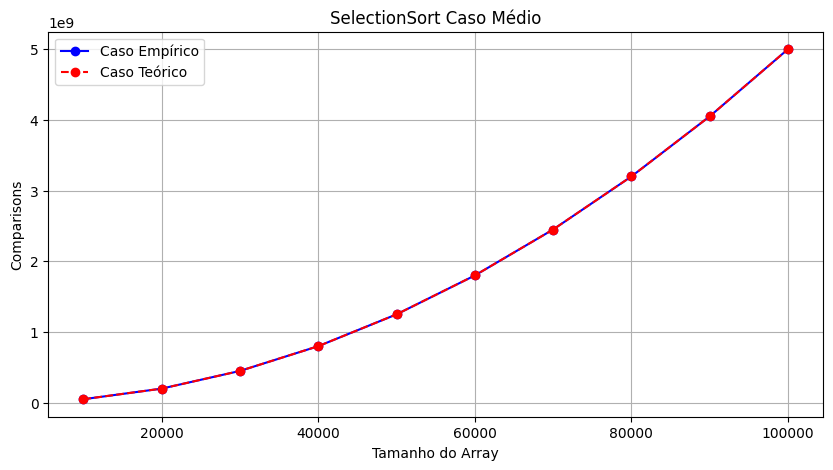

In [119]:
melhorCasoTeorico = normalizar(selectionSortMelhorCaso, 'Comparisons', 'n2')
piorCasoTeorico = normalizar(selectionSortPiorCaso, 'Comparisons', 'n2')
casoMedioTeorico = normalizar(selectionSortAnaliseCasoMedio, 'Mean_Comparisons', 'n2')

plot(selectionSortMelhorCaso, melhorCasoTeorico, 'SelectionSort Melhor Caso', 'Tamanho do Array', 'Comparisons', 'Comparisons')
plot(selectionSortPiorCaso, piorCasoTeorico, 'SelectionSort Pior Caso', 'Tamanho do Array', 'Comparisons', 'Comparisons')
plot(selectionSortAnaliseCasoMedio, casoMedioTeorico, 'SelectionSort Caso Médio', 'Tamanho do Array', 'Comparisons', 'Mean_Comparisons')

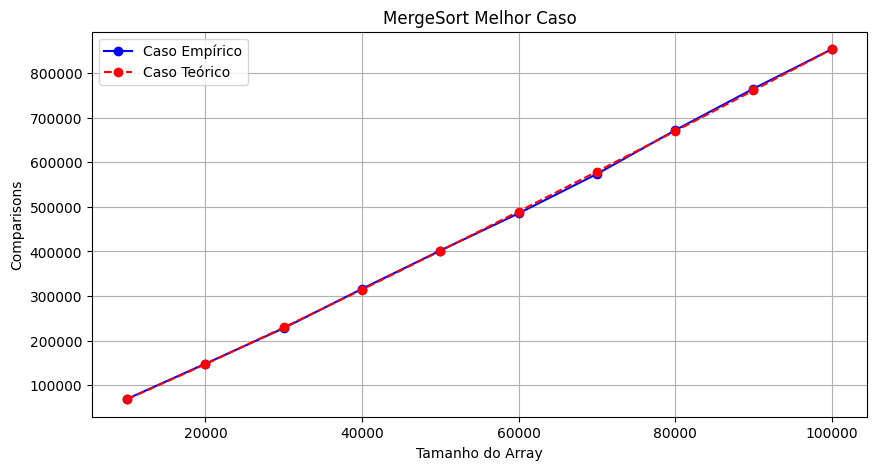

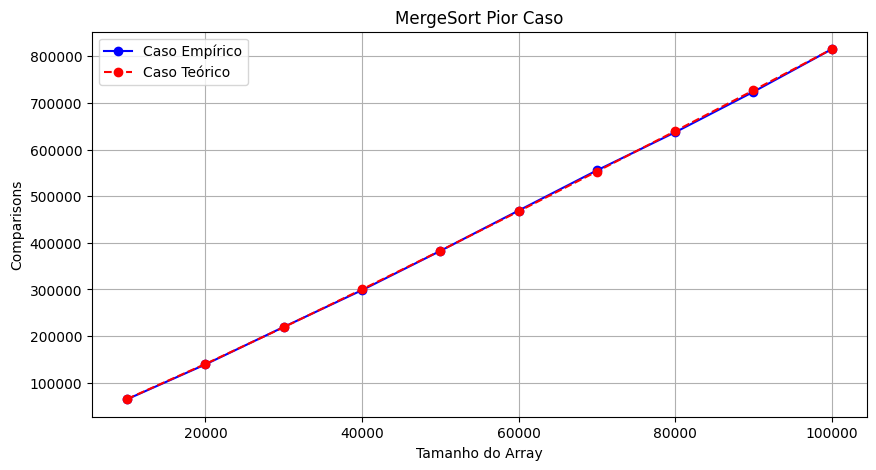

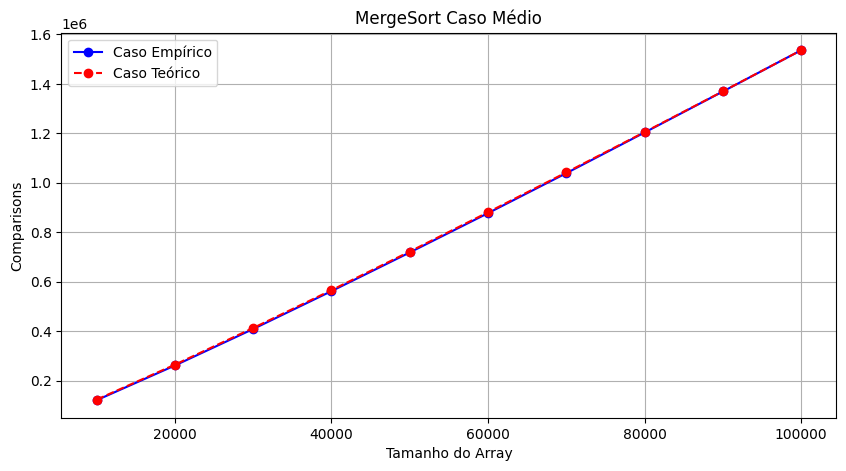

In [120]:
melhorCasoTeorico = normalizar(mergeSortMelhorCaso, 'Comparisons', 'nlogn')
piorCasoTeorico = normalizar(mergeSortPiorCaso, 'Comparisons', 'nlogn')
casoMedioTeorico = normalizar(mergeSortAnaliseCasoMedio, 'Mean_Comparisons', 'nlogn')

plot(mergeSortMelhorCaso, melhorCasoTeorico, 'MergeSort Melhor Caso', 'Tamanho do Array', 'Comparisons', 'Comparisons')
plot(mergeSortPiorCaso, piorCasoTeorico, 'MergeSort Pior Caso', 'Tamanho do Array', 'Comparisons', 'Comparisons')
plot(mergeSortAnaliseCasoMedio, casoMedioTeorico, 'MergeSort Caso Médio', 'Tamanho do Array', 'Comparisons', 'Mean_Comparisons')

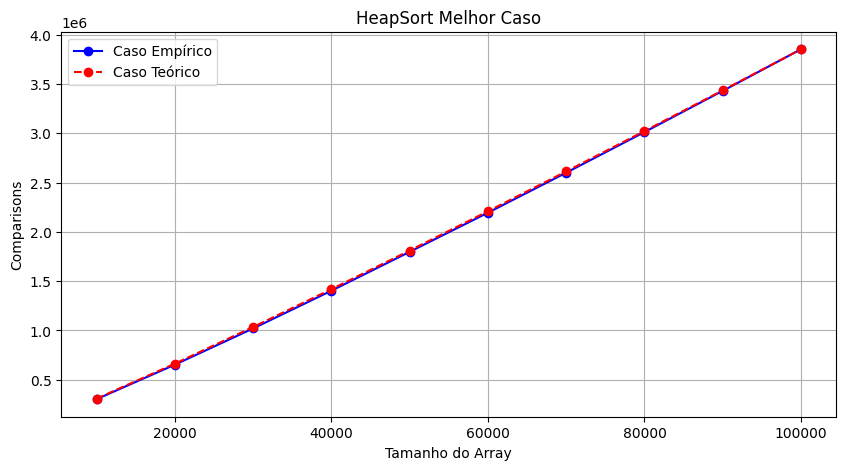

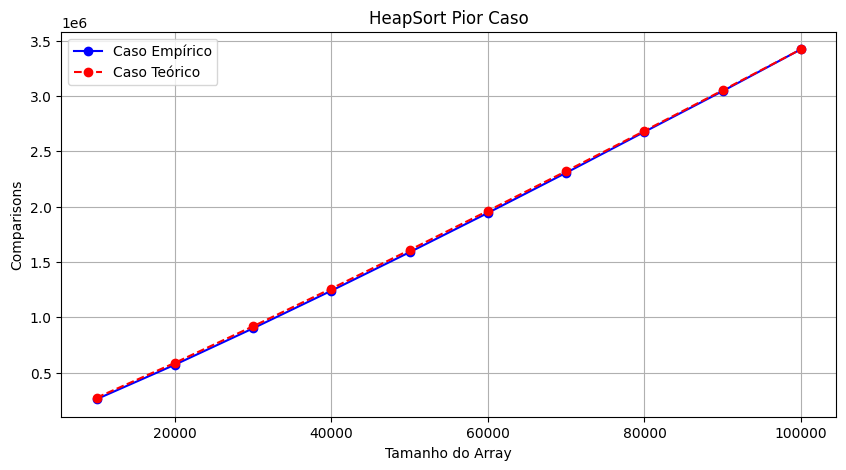

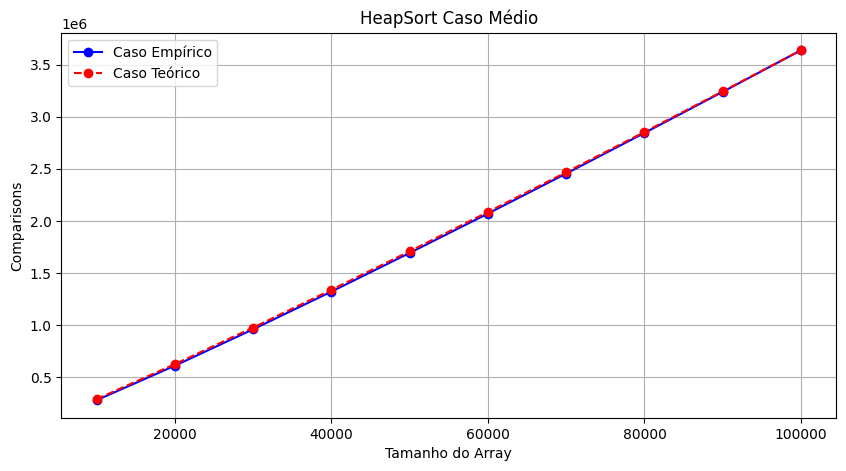

In [121]:
melhorCasoTeorico = normalizar(heapSortMelhorCaso, 'Comparisons', 'nlogn')
piorCasoTeorico = normalizar(heapSortPiorCaso, 'Comparisons', 'nlogn')
casoMedioTeorico = normalizar(heapSortAnaliseCasoMedio, 'Mean_Comparisons', 'nlogn')

plot(heapSortMelhorCaso, melhorCasoTeorico, 'HeapSort Melhor Caso', 'Tamanho do Array', 'Comparisons', 'Comparisons')
plot(heapSortPiorCaso, piorCasoTeorico, 'HeapSort Pior Caso', 'Tamanho do Array', 'Comparisons', 'Comparisons')
plot(heapSortAnaliseCasoMedio, casoMedioTeorico, 'HeapSort Caso Médio', 'Tamanho do Array', 'Comparisons', 'Mean_Comparisons')

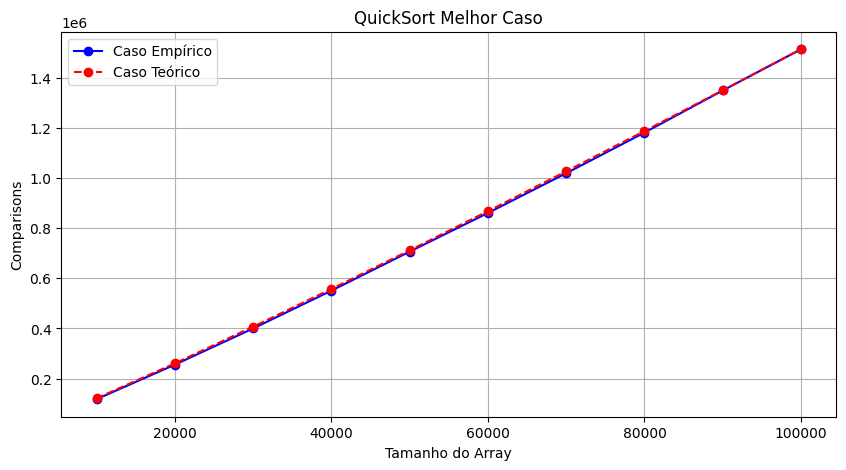

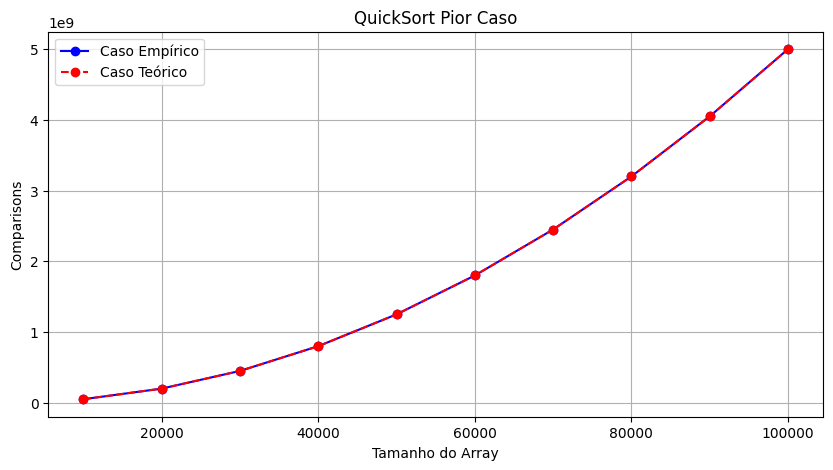

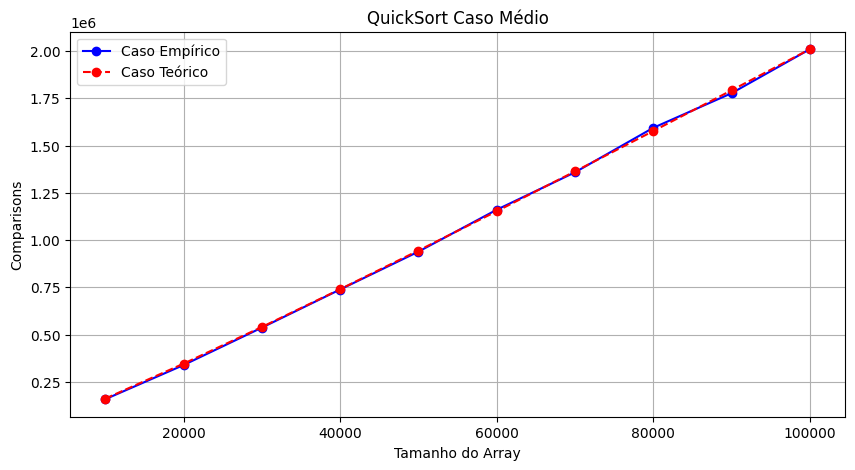

In [122]:
melhorCasoTeorico = normalizar(quickSortMelhorCaso, 'Comparisons', 'nlogn')
piorCasoTeorico = normalizar(quickSortPiorCaso, 'Comparisons', 'n2')
casoMedioTeorico = normalizar(quickSortAnaliseCasoMedio, 'Mean_Comparisons', 'nlogn')

plot(quickSortMelhorCaso, melhorCasoTeorico, 'QuickSort Melhor Caso', 'Tamanho do Array', 'Comparisons', 'Comparisons')
plot(quickSortPiorCaso, piorCasoTeorico, 'QuickSort Pior Caso', 'Tamanho do Array', 'Comparisons', 'Comparisons')
plot(quickSortAnaliseCasoMedio, casoMedioTeorico, 'QuickSort Caso Médio', 'Tamanho do Array', 'Comparisons', 'Mean_Comparisons')